<a href="https://colab.research.google.com/github/dgansen/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed()

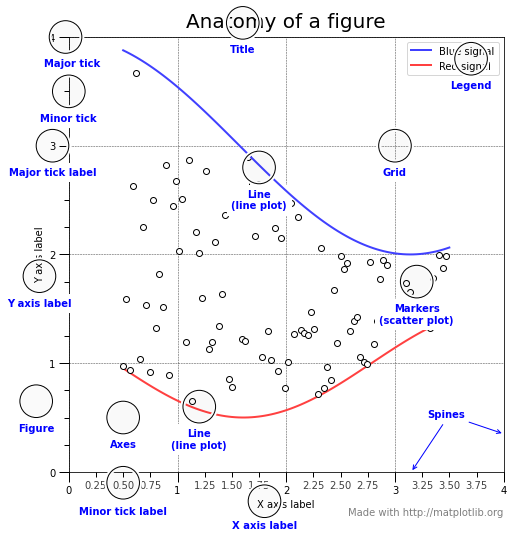

In [4]:
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X/0.75)/2
Y3 = np.random.uniform(Y1,Y2,len(X))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,aspect=1)

def minor_tick(x,pos):
  if not x % 1.0:
    return ''
  return '%.2f' % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0,4)
ax.set_ylim(0,4)

ax.tick_params(which='major',width=1.0)
ax.tick_params(which='major',length=10)
ax.tick_params(which='minor',width=1.0,labelsize=10)
ax.tick_params(which='minor',length=5,labelsize=10,labelcolor='0.25')

ax.grid(linestyle='--',linewidth=0.5,color='0.25',zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label='Blue signal', zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label='Red signal')
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title('Anatomy of a figure', fontsize=20, verticalalignment='bottom')
ax.set_xlabel('X axis label')
ax.set_ylabel('Y axis label')

ax.legend()

def circle (x, y, radius=0.15):
  from matplotlib.patches import Circle
  from matplotlib.patheffects import withStroke
  circle = Circle((x,y), radius, clip_on=False, zorder=10, linewidth=1, 
                  edgecolor='black', facecolor=(0,0,0,.0125),
                  path_effects=[withStroke(linewidth=5, foreground='w')])
  ax.add_artist(circle)

def text(x, y, text):
  ax.text(x, y, text, backgroundcolor='white', 
          ha='center', va='top', weight='bold', color='blue')
  
# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5), weight='bold', 
            color=color, arrowprops=dict(arrowstyle='->',
                                         connectionstyle='arc3',
                                         color=color))
ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

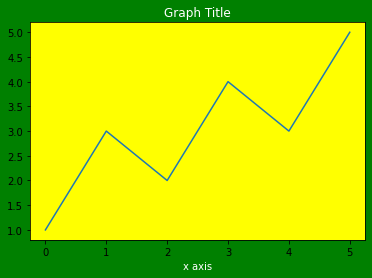

In [5]:
### FIGURE, AXES SYNTAX
import pandas as pd

df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b': [3,5,4,6,5,7]})

fig, ax = plt.subplots()

fig.patch.set_facecolor('green')

ax.plot(df['a'])
ax.set_facecolor('yellow')
ax.set_title('Graph Title', color='white')
ax.set_xlabel('x axis', color='white')

plt.show()

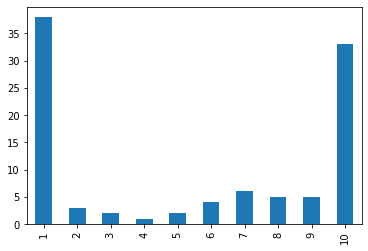

In [6]:
### MAKING EXPLANATORY VISUALIZATIONS WITH MATPLOTLIB
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar()

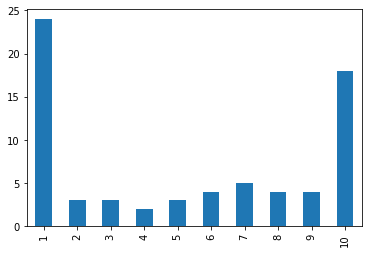

In [7]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar()

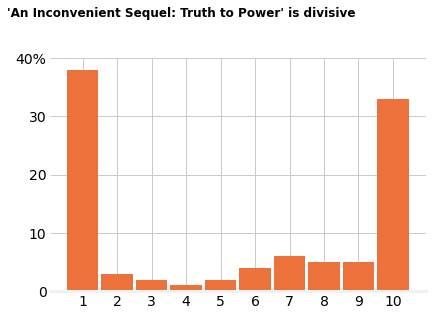

In [8]:
### MAKING THE GRAPH
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

fig.set_facecolor('white')

ax.bar(x=range(1,11,1), height=fake, color='#ED713A', width=0.91)

ax.set_facecolor('white')

ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1))

ax.set_yticks(range(0,41,10))
ax.set_yticklabels([0,10,20,30,'40%'])

ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.15)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [0]:
### REPRODUCE SOMETHING WITH REAL DATA
#Using data on Winning Scrabble Scores
#https://fivethirtyeight.com/features/how-qi-and-za-changed-scrabble/

In [0]:
df2 = pd.read_csv('https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv')

In [11]:
df2.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False


In [15]:
df2['winnerscore'].describe()

count    1.542642e+06
mean     2.074505e+02
std      2.107575e+02
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      4.110000e+02
max      8.030000e+02
Name: winnerscore, dtype: float64

In [0]:
#Filter to get non-zero winner/loser scores
nz_wscore = df2['winnerscore'][df2['winnerscore']>0]
nz_lscore = df2['loserscore'][df2['loserscore']>0]

In [42]:
#Checking out which fonts are available to use
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))


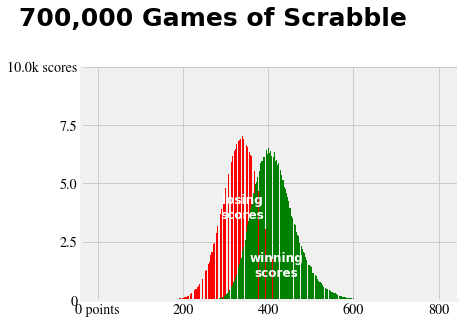

In [44]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
bins = 900
ax.hist(nz_lscore,bins=bins, color='red')
ax.hist(nz_wscore,bins=bins,color='green')

fig.set_facecolor('white')

ax.set_xticks(range(0,801,200))
ax.set_xticklabels(['0 points',200,400,600,800],fontname='STIXGeneral')

ax.set_yticks(range(0,10001,2500))
ax.set_yticklabels([0,2.5,5.0,7.5,'10.0k scores'],fontname='STIXGeneral')

ax.set_title("700,000 Games of Scrabble", fontsize=25, fontweight='bold', x=.35, y=1.15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(420, 1000, "winning\nscores",weight='bold',
        fontsize=12, ha="center", color='white')
ax.text(340, 3500, "losing\nscores",weight='bold',
        fontsize=12, ha="center", color='white')
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here